# PLC에 대한 이해

https://www.youtube.com/watch?v=xmFzSELuK3w

릴레이 제어반에서 진화된 방식으로, 

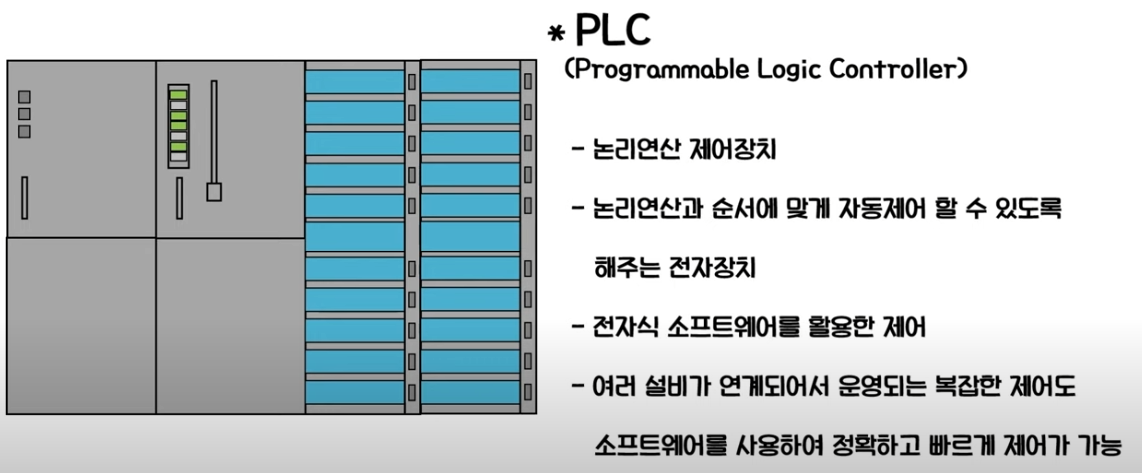

PLC는 아래와 같이 크게 4가지로 구성된다.(전원, 입력부, 출력부, 제어부)

전원부는 PLC를 동작시키기 위한 전원이 공급되는 부분

입력 모듈은 센서 신호 및 외부의 여러가지 입력신호를 받는 부분 
(AD 변환 등의 역할 포함)

CPU를 포함한 제어부(S/W)는 S/W로 설정된 논리 회로에 맞춰 입력 신호가 특정 조건에 충족되는 경우, 특정 출력을 발생하도록 처리해줌.

출력 모듈은 램프, 밸브, 모터 등이 역할을 수행하도록 그에 맞는 출력을 내보내주는 역할을 한다.



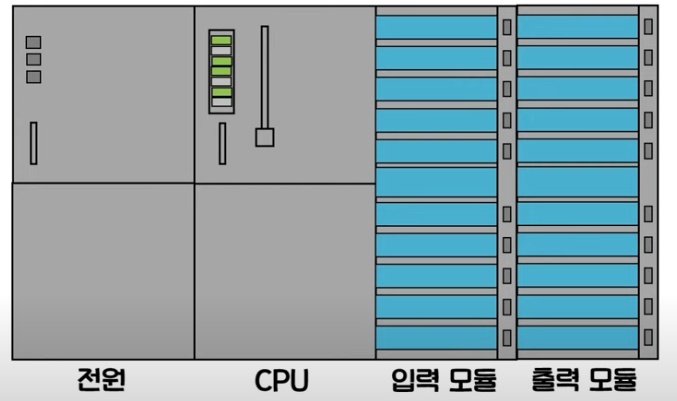

냉각수 탱크에 냉각수가 부족하지 않도록 자동으로 밸브를 개폐하여 냉각수를 충진하는 시스템을 만든다고 하자.

냉각수의 수위를 읽는 Level Transmitter는 입력부로 상시 센서값을 전송하고,
제어부에서 수위값이 낮다고 판단되면, 
출력부를 통해 냉각수 밸브를 열어 냉각수를 충진한다.

다시 입력부로 전송된 Level Transmitter의 센서값을 통해
제어부에서 수위값이 적절하다고 판단되면, 
출력부를 통해 냉각수 밸브를 닫아 냉각수를 충진을 멈춘다.

PLC는 이러한 로직들이 무수히 많이 집약된 컨트롤러인 셈이다.

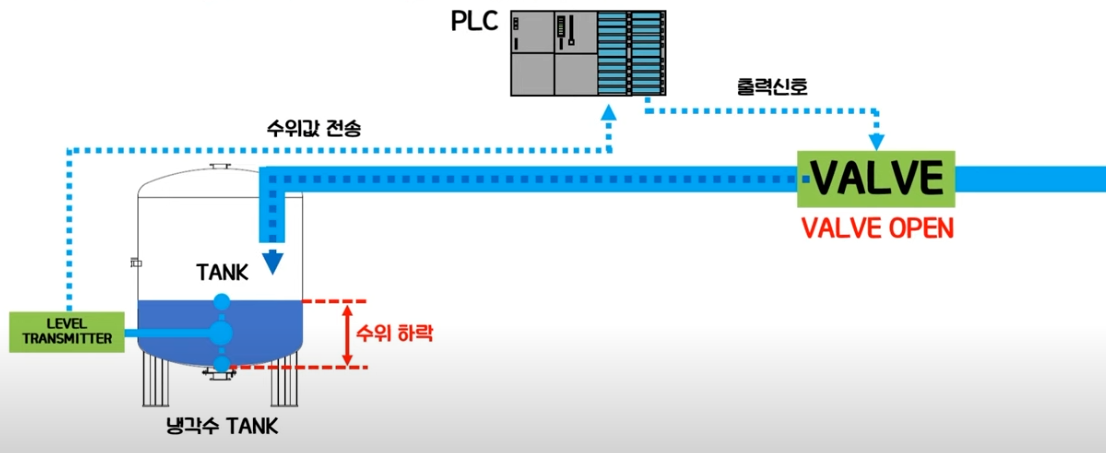

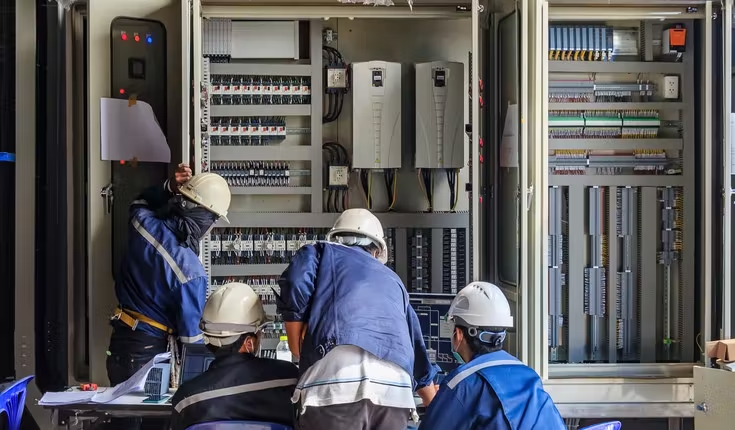

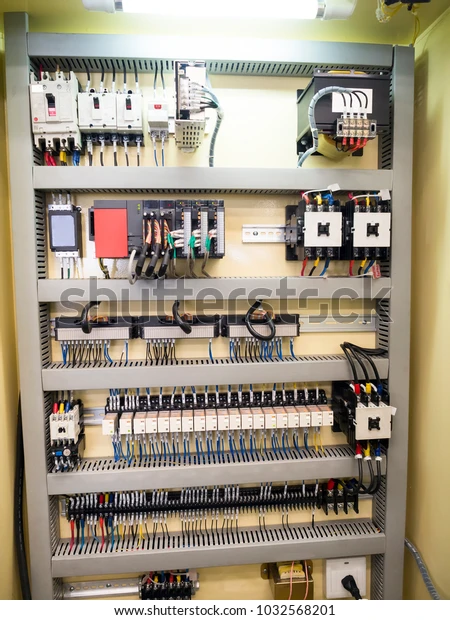

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

dir = '/content/gdrive/MyDrive/kamp/장비이상 탐지/온도 및 전류값'

files = os.listdir(dir)

print(files)  ## 디렉터리와 파일에 대한 전체 리스트

## 디렉토리인지 아닌지 검토하기
list_files = []
for file in files:
    if os.path.isdir(file):
        print(file + '\t' + 'directory')
    else:
        # print(file + '\t' + 'file')
        list_files.append(file)  ## 파일만 따로 분리함

print(list_files)


['kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.22.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.10.25.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sen

In [ ]:
import pandas as pd

sensor_data = pd.DataFrame()
for file in list_files:

  temp_df = pd.read_csv(dir+'/'+file)
  sensor_data = pd.concat([ temp_df, sensor_data])

sensor_data =  sensor_data.sort_values(by=['Date', 'Index']).reset_index(drop=True)
sensor_data

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06
...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27


In [ ]:
error_df = pd.read_csv('/content/gdrive/MyDrive/kamp/장비이상 탐지/Error Lot list.csv')
error_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-09-13,27.0,28.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-09-15,40.0,41.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-09-16,2.0,35.0,3.0,34.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-09-17,12.0,13.0,14.0,16.0,17.0,18.0,28.0,29.0,NaN,NaN,NaN


In [ ]:
import numpy as np
df_err = error_df.copy().transpose()
df_err.columns = df_err.iloc[0]
df_err=df_err.drop('0', axis='index').reset_index(drop = True).fillna(0)

pick_data = sensor_data.copy()
df = sensor_data.copy()


pick_data['NG'] =0
for dt in df_err.columns:
  pick_DATE = df[df.Date == dt]
  for i in range(len(df_err)):# len(df_err) : 11개 -> 한 날짜에 최대 에러 11개
    single_feature = df_err[dt][i]# 에러 루트 위치 검출
    # print(single_feature)
    if (single_feature !=0)  :
      
      c_inx = pick_DATE['Temp'][pick_DATE['Process'] == single_feature].index
      print(single_feature, c_inx, sep='\n')
      pick_data['NG'].iloc[c_inx] = 1
    else :pass

32.0
Int64Index([1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126,
            1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137,
            1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148,
            1149, 1150, 1151],
           dtype='int64')
33.0
Int64Index([1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162,
            1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173,
            1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184,
            1185, 1186, 1187],
           dtype='int64')
20.0
Int64Index([684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696,
            697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709,
            710, 711, 712, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64')
21.0
Int64Index([720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732,
            733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745,
 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


32.0
Int64Index([24336, 24337, 24338, 24339, 24340, 24341, 24342, 24343, 24344,
            24345, 24346, 24347, 24348, 24349, 24350, 24351, 24352, 24353,
            24354, 24355, 24356, 24357, 24358, 24359, 24360, 24361, 24362,
            24363, 24364, 24365, 24366, 24367, 24368, 24369, 24370, 24371],
           dtype='int64')
1.0
Int64Index([23220, 23221, 23222, 23223, 23224, 23225, 23226, 23227, 23228,
            23229, 23230, 23231, 23232, 23233, 23234, 23235, 23236, 23237,
            23238, 23239, 23240, 23241, 23242, 23243, 23244, 23245, 23246,
            23247, 23248, 23249, 23250, 23251, 23252, 23253, 23254, 23255],
           dtype='int64')
2.0
Int64Index([23256, 23257, 23258, 23259, 23260, 23261, 23262, 23263, 23264,
            23265, 23266, 23267, 23268, 23269, 23270, 23271, 23272, 23273,
            23274, 23275, 23276, 23277, 23278, 23279, 23280, 23281, 23282,
            23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291],
           dtype='int64')
3.0
In

In [ ]:
pick_DATE['Temp'][pick_DATE['Process'] == 31.0].index

Int64Index([50616, 50617, 50618, 50619, 50620, 50621, 50622, 50623, 50624,
            50625, 50626, 50627, 50628, 50629, 50630, 50631, 50632, 50633,
            50634, 50635, 50636, 50637, 50638, 50639, 50640, 50641, 50642,
            50643, 50644, 50645, 50646, 50647, 50648, 50649, 50650, 50651],
           dtype='int64')

In [ ]:
pick_data['NG'].unique()

array([0, 1])

In [ ]:
pick_data['NG'].value_counts()

0    47088
1     3996
Name: NG, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 10) 

In [ ]:
pick_data

,Index,Process,Time,Temp,Current,Date,NG
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06,0
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06,0
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06,0
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06,0
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06,0
...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27,0
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27,0
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27,0
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27,0


In [ ]:
pick_data.to_csv('test.csv')

In [ ]:
pick_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    51084 non-null  int64  
 1   Process  51084 non-null  int64  
 2   Time     51084 non-null  object 
 3   Temp     51084 non-null  float64
 4   Current  51084 non-null  float64
 5   Date     51084 non-null  object 
 6   NG       51084 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.7+ MB


In [ ]:
pick_data.corr()

,Index,Process,Temp,Current,NG
Index,1.000000,0.999730,0.071550,-0.071884,0.080130
Process,0.999730,1.000000,0.077020,-0.064931,0.080152
Temp,0.071550,0.077020,1.000000,-0.733613,0.955380
Current,-0.071884,-0.064931,-0.733613,1.000000,-0.857097
NG,0.080130,0.080152,0.955380,-0.857097,1.000000


In [ ]:
pick_data.groupby(['NG'], as_index=False ).mean()

,NG,Index,Process,Temp,Current
0,0,764.068807,21.710245,70.933261,1.605752
1,1,897.418919,25.414414,116.742880,1.102036


In [ ]:
pick_data.groupby(['NG'], as_index=False ).var()

,NG,Index,Process,Temp,Current
0,0,201847.466882,155.663231,11.908143,0.006165
1,1,157990.176904,121.822711,44.594529,0.011845


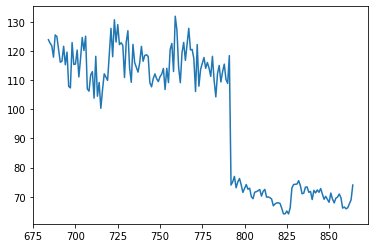

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pick_data['Temp'].iloc[36*19:36*24+1].plot()  
## 9월 6일자의 20/21/22(이상 NG=1), 23, 24(이상 NG=0)의 로트별 Temp값, Temp값이 작을때 정상인 경향이 보인다.
plt.show()

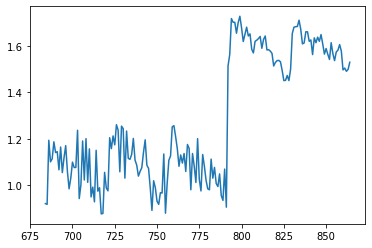

In [ ]:
pick_data['Current'].iloc[36*19:36*24+1].plot()
## 9월 6일자의 20/21/22(이상 NG=1), 23, 24(이상 NG=0)의 로트별 Current값, 전류값이 클때 정상인 경향이 보인다.
plt.show()

In [ ]:
pd.set_option('display.max_rows', None) 

In [ ]:
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).mean()

,Process,NG,Date,Index,Temp,Current
0,1,0,2021-09-06,18.5,70.954597,1.608347
1,1,0,2021-09-07,18.5,70.949160,1.604500
2,1,0,2021-09-08,18.5,71.282547,1.610824
3,1,0,2021-09-09,18.5,70.787318,1.604504
4,1,0,2021-09-10,18.5,70.824219,1.602583
5,1,0,2021-09-13,18.5,71.329145,1.612937
6,1,0,2021-09-14,18.5,71.205974,1.611730
7,1,0,2021-09-15,18.5,70.451175,1.594889
8,1,0,2021-09-16,18.5,70.860733,1.600806
9,1,0,2021-09-17,18.5,71.171434,1.610869


In [ ]:
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).var()

,Process,NG,Date,Index,Temp,Current
0,1,0,2021-09-06,111.0,11.176994,0.006151
1,1,0,2021-09-07,111.0,7.605692,0.004219
2,1,0,2021-09-08,111.0,17.111479,0.008703
3,1,0,2021-09-09,111.0,10.664262,0.006002
4,1,0,2021-09-10,111.0,12.551671,0.006628
5,1,0,2021-09-13,111.0,10.940951,0.006000
6,1,0,2021-09-14,111.0,13.343792,0.006693
7,1,0,2021-09-15,111.0,11.562727,0.005974
8,1,0,2021-09-16,111.0,11.772164,0.006683
9,1,0,2021-09-17,111.0,13.943057,0.006477


In [ ]:
len(pick_data.loc[pick_data['NG']== 1])

3996

In [ ]:
## 분산이 크면 즉, 편차가 커도 NG일 확률이 높다
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).var().nlargest(200, 'Temp')

,Process,NG,Date,Index,Temp,Current
1018,31,1,2021-09-06,111.0,69.832883,0.009772
890,27,1,2021-09-13,111.0,69.769002,0.009636
557,17,1,2021-09-17,111.0,64.472173,0.011780
1317,40,1,2021-10-05,111.0,62.796747,0.018545
1052,32,1,2021-09-07,111.0,61.727550,0.010853
824,25,1,2021-10-19,111.0,61.008272,0.012378
1349,41,1,2021-09-15,111.0,59.589409,0.010943
1020,31,1,2021-09-10,111.0,59.122695,0.015077
1120,34,1,2021-09-16,111.0,59.091377,0.010176
657,20,1,2021-10-01,111.0,59.033579,0.012484


In [ ]:
## 분산이 크면 즉, 편차가 커도 NG일 확률이 높다
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).var().nlargest(200, 'Current')

,Process,NG,Date,Index,Temp,Current
1055,32,1,2021-10-26,111.0,55.275901,0.019005
1317,40,1,2021-10-05,111.0,62.796747,0.018545
1154,35,1,2021-10-13,111.0,53.103186,0.018544
592,18,1,2021-10-06,111.0,44.864788,0.017542
923,28,1,2021-09-30,111.0,57.228604,0.017226
921,28,1,2021-09-13,111.0,45.782818,0.016314
1417,43,1,2021-10-08,111.0,27.726868,0.016219
692,21,1,2021-10-01,111.0,40.829067,0.016205
558,17,1,2021-10-01,111.0,43.129852,0.015574
1021,31,1,2021-09-30,111.0,55.954471,0.015363


In [ ]:
# 전류값이 작으면 NG라고 볼수 있다.
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).mean().nsmallest(200, 'Current')

,Process,NG,Date,Index,Temp,Current
394,12,1,2021-09-17,414.5,115.633802,1.058056
890,27,1,2021-09-13,954.5,116.445974,1.058304
1349,41,1,2021-09-15,1458.5,116.450526,1.059663
656,20,1,2021-09-06,702.5,115.265605,1.060025
263,8,1,2021-09-23,270.5,116.027445,1.061187
329,10,1,2021-09-29,342.5,117.724916,1.063021
1282,39,1,2021-09-15,1386.5,116.925503,1.064332
1087,33,1,2021-09-07,1170.5,117.398979,1.065208
32,1,1,2021-09-30,18.5,116.922392,1.065472
460,14,1,2021-09-17,486.5,116.414353,1.066359


In [ ]:
# 온도값이 크면 NG라고 볼수 있다.
pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).mean().nlargest(200, 'Temp')

,Process,NG,Date,Index,Temp,Current
757,23,1,2021-09-09,810.5,119.180750,1.107246
657,20,1,2021-10-01,702.5,118.440714,1.127901
1055,32,1,2021-10-26,1134.5,118.379793,1.124614
1251,38,1,2021-10-05,1350.5,118.051070,1.128450
1352,41,1,2021-10-19,1458.5,117.951744,1.112457
591,18,1,2021-10-01,630.5,117.943430,1.133798
920,28,1,2021-09-10,990.5,117.928990,1.074483
461,14,1,2021-09-27,486.5,117.837074,1.076466
64,2,1,2021-09-16,54.5,117.819801,1.072058
1252,38,1,2021-10-07,1350.5,117.769525,1.133165


In [ ]:
pd.set_option('display.max_rows', 10)
pick_groupby_mean = pick_data.groupby(['Process', 'NG', 'Date'], as_index=False ).mean()
pick_groupby_mean

,Process,NG,Date,Index,Temp,Current
0,1,0,2021-09-06,18.5,70.954597,1.608347
1,1,0,2021-09-07,18.5,70.949160,1.604500
2,1,0,2021-09-08,18.5,71.282547,1.610824
3,1,0,2021-09-09,18.5,70.787318,1.604504
4,1,0,2021-09-10,18.5,70.824219,1.602583
...,...,...,...,...,...,...
1414,43,0,2021-10-25,1530.5,70.253726,1.591170
1415,43,0,2021-10-26,1530.5,71.027132,1.608611
1416,43,0,2021-10-27,1530.5,70.217263,1.586139
1417,43,1,2021-10-08,1530.5,117.011034,1.121165


In [ ]:
from sklearn.model_selection import train_test_split

X_data = pick_groupby_mean [['Temp', 'Current']]
Y_data = pick_groupby_mean['NG']

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=777, stratify=Y_data) 

In [ ]:
x_train.shape, y_train.shape

((993, 2), (993,))

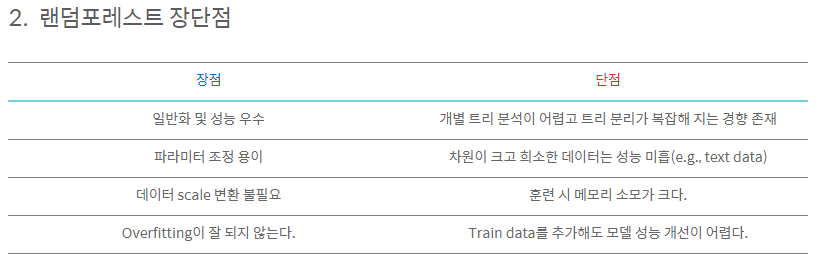

https://heytech.tistory.com/149

In [ ]:
## 랜덤 포레스트 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

x_train_temp = x_train.copy()
y_train_temp = y_train.copy()


RF = RandomForestClassifier(random_state = 1)
parameters = {'max_depth' : [3,5,7], 'min_samples_split' : [2,3,4]}  

stratified_5_fold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_RF = GridSearchCV(RF, param_grid= parameters, cv = stratified_5_fold_cv , refit = True)
grid_RF.fit(x_train_temp, y_train_temp)
RF_best_estimator = grid_RF.best_estimator_ 

print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')

### GridSearchCV 관련 요소 :
1.0
{'max_depth': 3, 'min_samples_split': 2}
{'mean_fit_time': array([0.1656147 , 0.15405779, 0.14730582, 0.15926566, 0.14916477,
       0.14918184, 0.15889421, 0.14853425, 0.14911399]), 'std_fit_time': array([0.01327421, 0.00866848, 0.00528185, 0.00946466, 0.0051693 ,
       0.00591412, 0.01906888, 0.00360931, 0.00460574]), 'mean_score_time': array([0.01642594, 0.01461787, 0.01299491, 0.01448512, 0.01435614,
       0.01460314, 0.0145196 , 0.01357946, 0.01466351]), 'std_score_time': array([0.00363537, 0.00196873, 0.00048586, 0.00067872, 0.00181602,
       0.00132307, 0.00248109, 0.00075027, 0.0036111 ]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
             mask=[False, False, False, False, False, False, False, Fal

In [ ]:
## 랜덤 포레스트 테스트

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

x_test_temp = x_test.copy()
y_test_temp = y_test.copy()

pred = RF_best_estimator.predict(x_test_temp)
accuracy = accuracy_score(y_test_temp, pred)
precision = precision_score(y_test_temp, pred)
recall = recall_score(y_test_temp, pred)
f1 = f1_score(y_test_temp, pred)

print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}' .format(accuracy , precision ,recall, f1))

Accuracy:1.0000, Precision:1.0000, Recall:1.0000, F1:1.0000


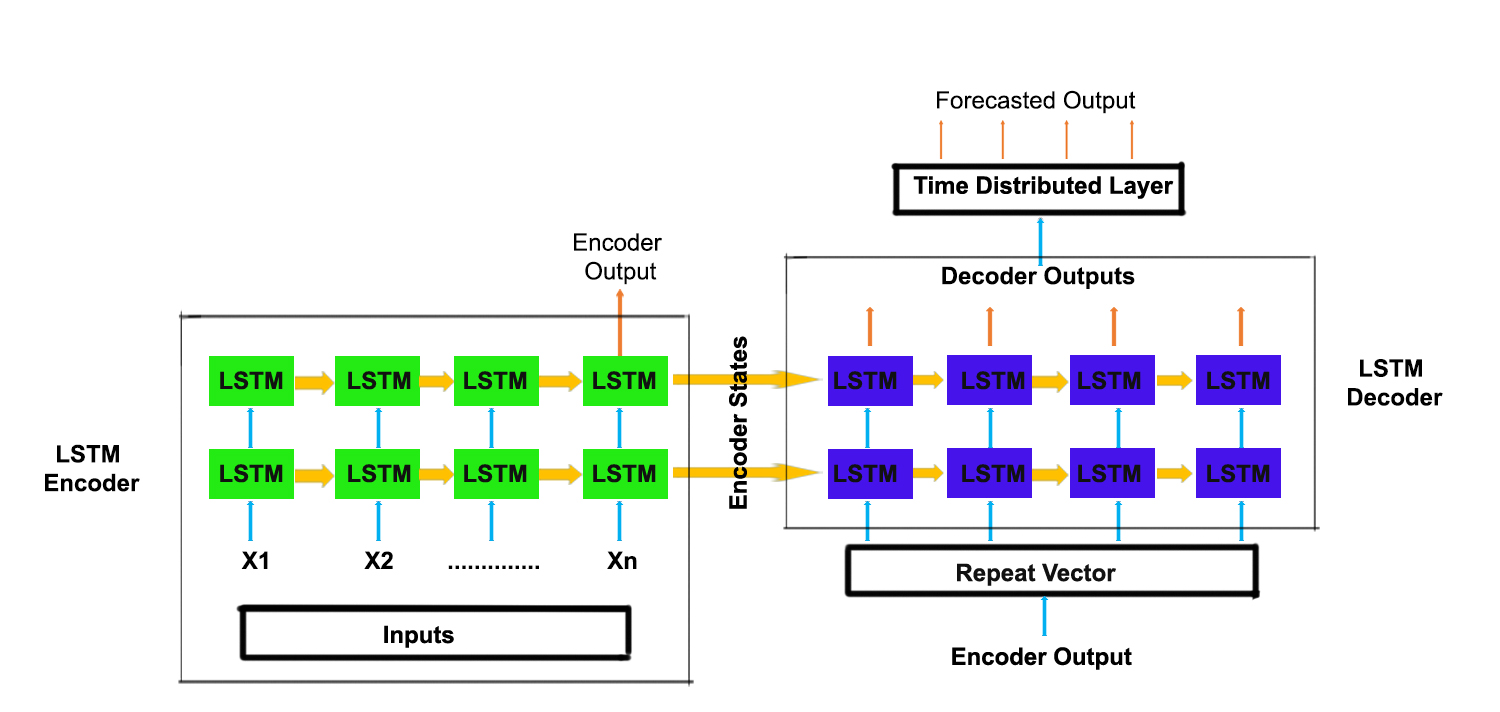

In [ ]:
# LSTM_AE 학습준비 과정

pick_data

,Index,Process,Time,Temp,Current,Date,NG
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06,0
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06,0
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06,0
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06,0
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06,0
...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27,0
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27,0
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27,0
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27,0


In [ ]:
# LSTM_AE 학습준비 과정


pick_data_good = pick_data.loc[pick_data['NG']==0].reset_index(drop = True)
pick_data_train = pick_data_good[:36*1000]

pick_data_ng = pick_data.loc[pick_data['NG']==1]
print('ng의 개수: ', len(pick_data_ng))



pick_data_test =  pd.concat([pick_data_good[36*1000:],  pick_data_ng ], axis = 0) 




ng의 개수:  3996


In [ ]:
pick_data_test

,Index,Process,Time,Temp,Current,Date,NG
36000,793,23,오후 5:41:40.1,75.139142,1.495000,2021-10-18,0
36001,794,23,오후 5:41:45.1,73.660421,1.481000,2021-10-18,0
36002,795,23,오후 5:41:50.1,77.177660,1.701000,2021-10-18,0
36003,796,23,오후 5:41:55.1,77.586434,1.667000,2021-10-18,0
36004,797,23,오후 5:42:00.1,77.877104,1.747000,2021-10-18,0
...,...,...,...,...,...,...,...
49387,1400,39,오후 6:34:33.6,108.579813,1.095482,2021-10-26,1
49388,1401,39,오후 6:34:38.6,111.110672,0.838843,2021-10-26,1
49389,1402,39,오후 6:34:43.7,110.315626,1.023348,2021-10-26,1
49390,1403,39,오후 6:34:48.7,102.778083,1.117942,2021-10-26,1


In [ ]:
## 스케일링 적용
from sklearn.preprocessing import StandardScaler
import pandas as pd

train_temp = pick_data_train.drop(columns = ['Time', 'Date'])
test_temp = pick_data_test.drop(columns = ['Time', 'Date'])

scaler = StandardScaler()  ## 정규화 객체 생성
scaler.fit(train_temp)        ##  학습데이터셋만 가지고 fit하고, 테스트셋에는 그대로 트랜스폼만 하는 이유  :  https://yeko90.tistory.com/105

scaled_train = scaler.transform(train_temp)
pick_scaled_train = pd.DataFrame(data = scaled_train , columns= train_temp.columns)




scaled_test = scaler.transform(test_temp)
pick_scaled_test = pd.DataFrame(data = scaled_test , columns= test_temp.columns)



pick_scaled_train, pick_scaled_test




(          Index   Process      Temp   Current   NG
 0     -1.680858 -1.642409  1.216760  0.052858  0.0
 1     -1.678636 -1.642409  1.657275 -0.965663  0.0
 2     -1.676414 -1.642409  1.807051  1.211425  0.0
 3     -1.674192 -1.642409  1.635850  1.657028  0.0
 4     -1.671970 -1.642409  2.009588  1.809806  0.0
 ...         ...       ...       ...       ...  ...
 35995  0.067916  0.037928 -1.339168 -0.863811  0.0
 35996  0.070138  0.037928 -1.564687 -1.996916  0.0
 35997  0.072360  0.037928 -1.504816 -1.334877  0.0
 35998  0.074582  0.037928 -1.416566 -1.564044  0.0
 35999  0.076804  0.037928 -1.582401 -1.513118  0.0
 
 [36000 rows x 5 columns],           Index   Process       Temp   Current   NG
 0      0.079026  0.117944   1.216760 -1.411266  0.0
 1      0.081248  0.117944   0.788568 -1.589507  0.0
 2      0.083470  0.117944   1.807051  1.211425  0.0
 3      0.085692  0.117944   1.925419  0.778554  0.0
 4      0.087914  0.117944   2.009588  1.797075  0.0
 ...         ...       ...    

In [ ]:
X_pick_data = pick_scaled_train[['Temp', 'Current']]
Y_pick_data = pick_scaled_train[['Temp', 'Current']]  ## 자기 자신이 그대로 출력되어야하므로


len(Y_pick_data)

36000

In [ ]:
# LSTM_AE 학습준비 과정
## 시계열 데이터셋 만들기!!!!!!!!  , batch 미적용

TIME_STEP=36
def create_sequences(X, y, time_steps =TIME_STEP):
  Xs, ys = [], []
  for i in range(0,len(y)-time_steps, time_steps):
    Xs.append(X.iloc[i:(i+time_steps)].values)
    ys.append(y.iloc[i:(i+time_steps)].values)
    # ys.append(y.iloc[i+time_steps])
  return np.array(Xs), np.array(ys)

X_train, Y_train = create_sequences(X_pick_data, Y_pick_data)

X_train.shape, Y_train.shape 

((999, 36, 2), (999, 36, 2))

In [ ]:
# LSTM_AE 학습준비 과정
## 시계열 데이터셋 만들기!!!!!!!!, batch 개념 적용 (또다른 방법)

from tensorflow.keras.preprocessing import timeseries_dataset_from_array

TIME_STEP=36

## Series Dataset을 생성함.
dataset = timeseries_dataset_from_array(X_pick_data[:-TIME_STEP], Y_pick_data[TIME_STEP-1::TIME_STEP], sequence_length= TIME_STEP ,batch_size = 1, shuffle= True) #  batch_size = batch_size 삭제
## TimeSeries로 생성된 데이터 셋에 대해 셔플을 적용함

i = 0
for batch in dataset:
  i+=1
  print(i)
  inputs, labels = batch
  print(inputs.numpy().shape)  


1
(1, 36, 2)
2
(1, 36, 2)
3
(1, 36, 2)
4
(1, 36, 2)
5
(1, 36, 2)
6
(1, 36, 2)
7
(1, 36, 2)
8
(1, 36, 2)
9
(1, 36, 2)
10
(1, 36, 2)
11
(1, 36, 2)
12
(1, 36, 2)
13
(1, 36, 2)
14
(1, 36, 2)
15
(1, 36, 2)
16
(1, 36, 2)
17
(1, 36, 2)
18
(1, 36, 2)
19
(1, 36, 2)
20
(1, 36, 2)
21
(1, 36, 2)
22
(1, 36, 2)
23
(1, 36, 2)
24
(1, 36, 2)
25
(1, 36, 2)
26
(1, 36, 2)
27
(1, 36, 2)
28
(1, 36, 2)
29
(1, 36, 2)
30
(1, 36, 2)
31
(1, 36, 2)
32
(1, 36, 2)
33
(1, 36, 2)
34
(1, 36, 2)
35
(1, 36, 2)
36
(1, 36, 2)
37
(1, 36, 2)
38
(1, 36, 2)
39
(1, 36, 2)
40
(1, 36, 2)
41
(1, 36, 2)
42
(1, 36, 2)
43
(1, 36, 2)
44
(1, 36, 2)
45
(1, 36, 2)
46
(1, 36, 2)
47
(1, 36, 2)
48
(1, 36, 2)
49
(1, 36, 2)
50
(1, 36, 2)
51
(1, 36, 2)
52
(1, 36, 2)
53
(1, 36, 2)
54
(1, 36, 2)
55
(1, 36, 2)
56
(1, 36, 2)
57
(1, 36, 2)
58
(1, 36, 2)
59
(1, 36, 2)
60
(1, 36, 2)
61
(1, 36, 2)
62
(1, 36, 2)
63
(1, 36, 2)
64
(1, 36, 2)
65
(1, 36, 2)
66
(1, 36, 2)
67
(1, 36, 2)
68
(1, 36, 2)
69
(1, 36, 2)
70
(1, 36, 2)
71
(1, 36, 2)
72
(1, 36, 2)
7

In [ ]:
Y_pick_data[35::36]

,Temp,Current
35,-1.003263,-1.220293
71,-1.237928,-1.182099
107,-1.292832,-1.513118
143,-1.482906,-1.042052
179,-1.447148,-1.080247
...,...,...
35855,-1.237928,-1.462192
35891,-0.557025,-1.258488
35927,-0.713694,-1.513118
35963,-1.644865,-1.118441


In [ ]:
import keras
import tensorflow
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras import backend as K
from keras.layers import *
from keras.applications import imagenet_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam   ## https://limitsinx.tistory.com/157

In [ ]:
timesteps = 36
features = 2

Lstm_AE_3 = Sequential()

# Encoder
Lstm_AE_3.add(LSTM(32,activation ='relu', input_shape =(timesteps, features), return_sequences =True))
Lstm_AE_3.add(LSTM(16,activation ='relu', return_sequences =False))
Lstm_AE_3.add(RepeatVector(timesteps))

# Decoder
Lstm_AE_3.add(LSTM(32, activation ='relu', return_sequences =True))
Lstm_AE_3.add(LSTM(16, activation ='relu',return_sequences =True))  #  모든 Y0~Yt 모든 값이 필요하므로, 두번째 LSTM도 return_sequences =True로 설정 필요
Lstm_AE_3.add(TimeDistributed(Dense(features))) # 원복하기 위해 many to many을 적용하였으므로, TimeDistributed 사용

Lstm_AE_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 36, 32)            4480      
                                                                 
 lstm_9 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 36, 16)           0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 36, 32)            6272      
                                                                 
 lstm_11 (LSTM)              (None, 36, 16)            3136      
                                                                 
 time_distributed_2 (TimeDis  (None, 36, 2)            34        
 tributed)                                            

**< return_sequences =True > 에 대한 이해**

만일 모든 Y0~Yt 모든 값이 필요하다면, 두번째 LSTM도 return_sequences =True로 설정 필요




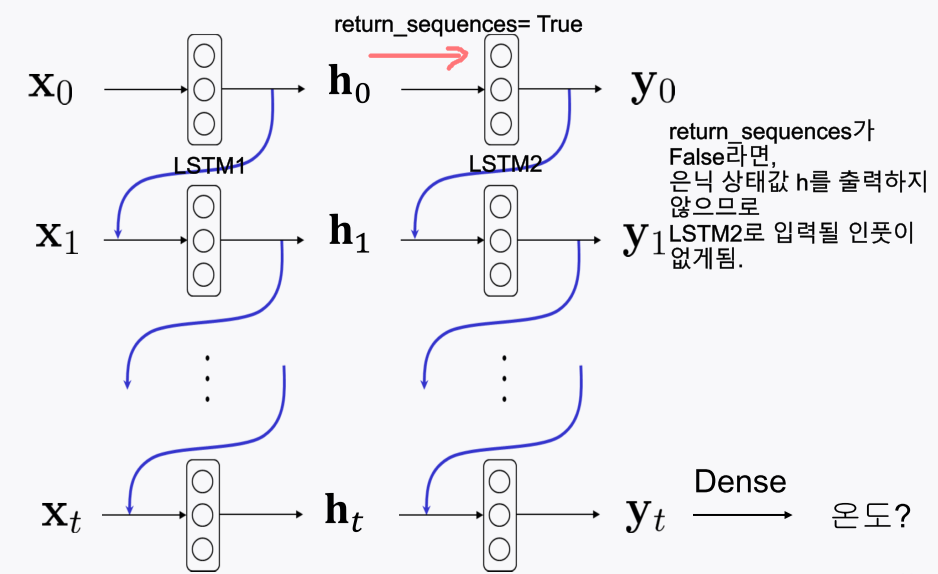

**Repeat Vector에 대한 이해**

아래 그림과 같이 입력해주고자, Time Sequence에 대한 차원을 추가함 

아래 그림 기준으로 Repeat Vector를 통과하면 (None, Input_shape)에서  (None, 28, Input_shape)로 차원 변경됨

https://stackoverflow.com/questions/51749404/how-to-connect-lstm-layers-in-keras-repeatvector-or-return-sequence-true

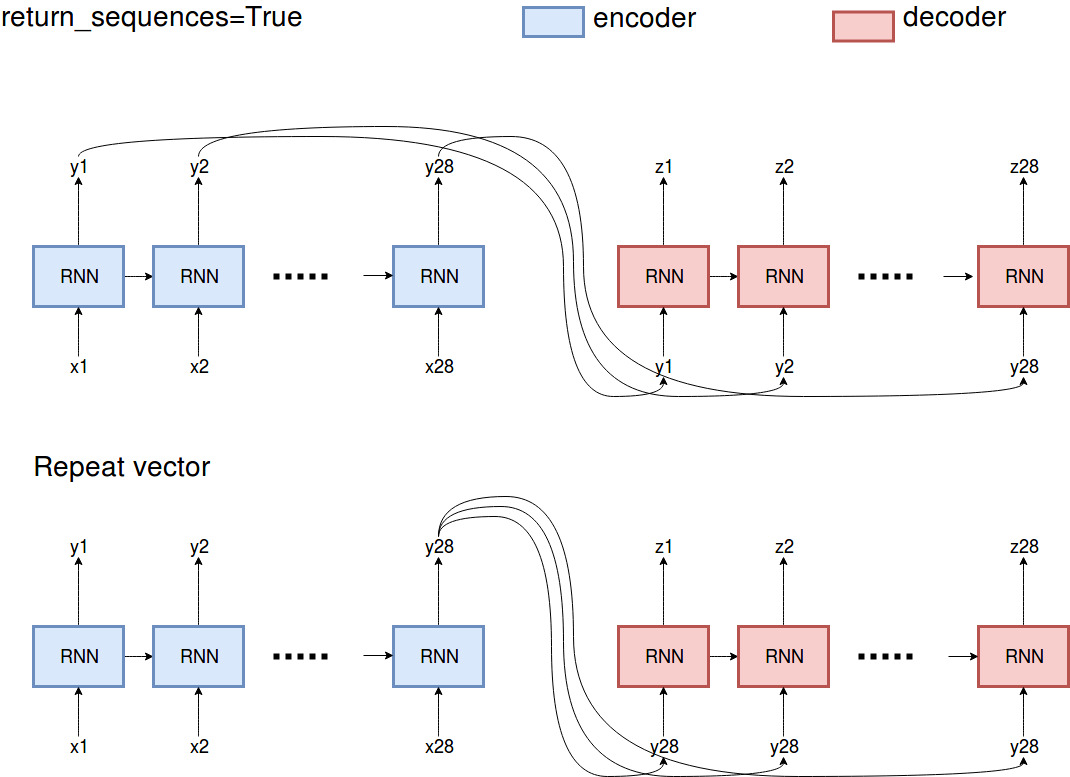

**TimeDistributed의 의미**

각 스텝마다 cost (오류)를 계산해서 하위 스텝으로 오류를 전파하여 각 weight를 업데이트하라는 것이다.
즉, 각 스텝마다의 출력 Y_n이 모두 출력 결과로 사용되는 one to many 또는 many to many에서 필요한 기능이다.

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chunjein&logNo=221589624838


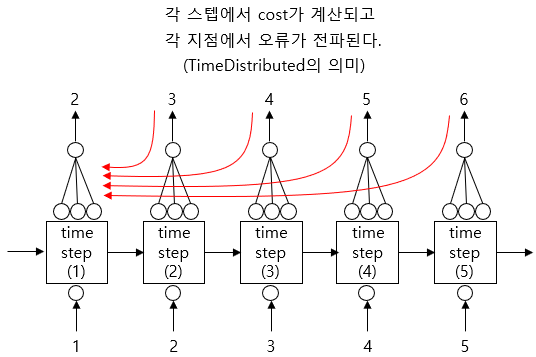

TimeDistributed를 쓰지 않았을때의 그림. 

one to one 또는 many to one에서는 최종 스텝의 결과만 참조하므로 TimeDistributed 쓰지 않아야함

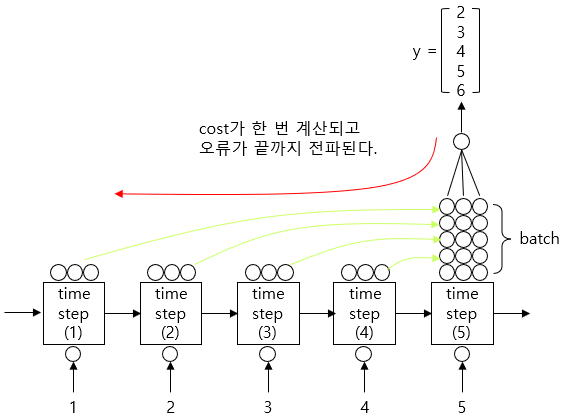

In [ ]:
## 스케일링 적용후 모델 학습 (Loss 값이 확 커지는 현상이 없음)
epochs = 200
batch = 16
lr = 0.001
optimizer = Adam(lr)
es_callback = EarlyStopping(monitor ='loss', patience = 15, restore_best_weights= True )
Lstm_AE_3.compile(loss='mse', optimizer=optimizer)
history = Lstm_AE_3.fit(X_train, Y_train ,epochs=epochs, batch_size=batch, callbacks = [es_callback])

Epoch 1/200
63/63 [==============================] - 9s 57ms/step - loss: 0.8813
Epoch 2/200
63/63 [==============================] - 4s 61ms/step - loss: 0.5380
Epoch 3/200
63/63 [==============================] - 4s 62ms/step - loss: 0.4216
Epoch 4/200
63/63 [==============================] - 3s 55ms/step - loss: 0.3693
Epoch 5/200
63/63 [==============================] - 4s 63ms/step - loss: 0.3553
Epoch 6/200
63/63 [==============================] - 4s 58ms/step - loss: 0.3464
Epoch 7/200
63/63 [==============================] - 4s 68ms/step - loss: 0.3374
Epoch 8/200
63/63 [==============================] - 4s 66ms/step - loss: 0.3294
Epoch 9/200
63/63 [==============================] - 4s 65ms/step - loss: 0.3120
Epoch 10/200
63/63 [==============================] - 4s 61ms/step - loss: 0.2920
Epoch 11/200
63/63 [==============================] - 4s 57ms/step - loss: 0.2770
Epoch 12/200
63/63 [==============================] - 4s 59ms/step - loss: 0.2669
Epoch 13/200
63/63 [=====

In [ ]:
Lstm_AE_3.save('Lstm_AE_3')

In [ ]:
## 스케일링 적용후 모델 학습 (Loss 값이 확 커지는 현상 존재, 딥러닝은 스케일링 필수)
epochs = 200
batch = 16
lr = 0.001
optimizer = Adam(lr)
es_callback = EarlyStopping(monitor ='loss', patience = 15, restore_best_weights= True )
Lstm_AE_3.compile(loss='mse', optimizer=optimizer)
history = Lstm_AE_3.fit(X_train, Y_train ,epochs=epochs, batch_size=batch, callbacks = [es_callback])

Epoch 1/200
63/63 [==============================] - 9s 71ms/step - loss: 29619.8086
Epoch 2/200
63/63 [==============================] - 5s 73ms/step - loss: 216.2453
Epoch 3/200
63/63 [==============================] - 4s 65ms/step - loss: 142.7313
Epoch 4/200
63/63 [==============================] - 4s 57ms/step - loss: 115.3698
Epoch 5/200
63/63 [==============================] - 4s 59ms/step - loss: 111.5090
Epoch 6/200
63/63 [==============================] - 4s 58ms/step - loss: 105.8128
Epoch 7/200
63/63 [==============================] - 4s 59ms/step - loss: 96.2402
Epoch 8/200
63/63 [==============================] - 4s 59ms/step - loss: 91.4445
Epoch 9/200
63/63 [==============================] - 3s 55ms/step - loss: 87.3664
Epoch 10/200
63/63 [==============================] - 4s 57ms/step - loss: 83.2409
Epoch 11/200
63/63 [==============================] - 4s 60ms/step - loss: 1540.5680
Epoch 12/200
63/63 [==============================] - 4s 58ms/step - loss: 187794496.0

In [ ]:
pick_scaled_test.sort_values(by = 'Index')['NG'].value_counts()

0.0    11088
1.0     3996
Name: NG, dtype: int64

In [ ]:
# pick_split_valid = pick_scaled_test[:36*200] ### Valid set을 통해 Threshold를 구할 계획

# pick_split_test = pick_scaled_test[36*200:] ### Test set

In [ ]:
TIME_STEP=36
def create_sequences(X, y, time_steps =TIME_STEP):
  Xs, ys = [], []
  for i in range(0,len(X.index)-time_steps, time_steps):
    Xs.append(X.iloc[i:(i+time_steps)].values)
    ys.append(y.iloc[i+time_steps-1])
    # ys.append(y.iloc[i+time_steps])
  return np.array(Xs), np.array(ys)

X_valid, Y_valid = create_sequences(pick_scaled_test[['Temp', 'Current']], pick_scaled_test['NG'])

X_valid.shape, Y_valid.shape

((418, 36, 2), (418,))

In [ ]:
Y_valid

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
pd.DataFrame(Y_valid).value_counts()

## 이상값을 가진 개수는 110개. (정확히는 우니도우 사이즈 적용한 개수)

0.0    308
1.0    110
dtype: int64

In [ ]:
# prediction = Lstm_AE_3.predict(X_valid)

In [ ]:
# mse = np.mean(np.power(X_valid - prediction, 2), axis = 1)
# mse.shape

(199, 2)

In [ ]:
# mse = np.mean(mse, axis = 1)
# mse.shape

(199,)

In [ ]:
## 학습 완료된 모델을 통해 정상데이터에 대한 Loss 값 재산출
## 이 Loss 값을 기준으로 Threshold 지정

# model evaluate와 predict의 차이점
# https://www.inflearn.com/questions/193278

Lstm_AE_3.evaluate(X_train, Y_train, return_dict = True)  

32/32 [==============================] - 0s 14ms/step - loss: 0.1585


{'loss': 0.1585323065519333}

In [ ]:
# Loss 값을 기준으로 Threshold 지정

Threshold = 8 * 0.1585323065519333

In [ ]:
X_valid[0].reshape(1,36,2)

array([[[ 1.21675959e+00, -1.41126611e+00],
        [ 7.88568228e-01, -1.58950725e+00],
        [ 1.80705068e+00,  1.21142503e+00],
        [ 1.92541894e+00,  7.78553675e-01],
        [ 2.00958776e+00,  1.79707450e+00],
        [ 1.18038755e+00,  1.92438961e+00],
        [ 3.32345757e-01,  2.01351018e+00],
        [ 4.44095477e-01,  1.17323050e+00],
        [ 1.13105664e+00,  3.32950813e-01],
        [ 1.23017336e+00,  4.47534406e-01],
        [ 1.04810552e+00,  1.12230446e+00],
        [ 5.79833807e-01,  1.23688805e+00],
        [ 4.27769985e-02,  1.05864690e+00],
        [ 4.44095477e-01,  5.87581020e-01],
        [ 2.62350363e-01,  4.01260742e-02],
        [ 3.61467086e-01,  4.47534406e-01],
        [ 1.79399249e-01,  2.56561750e-01],
        [ 6.96290032e-04,  3.58413833e-01],
        [ 2.13607698e-02,  1.80172688e-01],
        [-2.15391308e-01,  1.93154307e-03],
        [-1.89177257e-01,  2.73945638e-02],
        [-1.73079951e-01, -2.14504133e-01],
        [-4.16351853e-01, -1.890

In [ ]:
## Valid 데이터셋을 (1,36,2) 형태로 바꾸어 일일이 evaluate시킴 
## 그렇게 하지 않으면 각각의 loss값이 아닌 평균 loss값이 나오게됨

loss_list = []
for i in range(len(Y_valid)):
  loss_list.append(Lstm_AE_3.evaluate(X_valid[i].reshape(1,36,2), X_valid[i].reshape(1,36,2), return_dict = False))

loss_list

1/1 [==============================] - 0s 27ms/step - loss: 2185691.2500


[0.23012979328632355,
 0.11165370047092438,
 0.09733360260725021,
 0.09119221568107605,
 0.18156416714191437,
 0.108989417552948,
 0.1474742889404297,
 0.0867624580860138,
 0.20556262135505676,
 0.26884597539901733,
 0.09414008259773254,
 0.07111217081546783,
 0.33575722575187683,
 0.07235261797904968,
 0.2193494439125061,
 0.09468603134155273,
 0.07401066273450851,
 0.10566152632236481,
 0.09307701140642166,
 0.39987701177597046,
 0.08060643076896667,
 0.07031145691871643,
 0.43456724286079407,
 0.0786881297826767,
 0.35425838828086853,
 0.08760876953601837,
 0.15186506509780884,
 0.09872311353683472,
 0.3216601610183716,
 0.09047820419073105,
 0.25423139333724976,
 0.08644142001867294,
 0.11206559091806412,
 0.10396791994571686,
 0.20539304614067078,
 0.09054580330848694,
 0.08534631133079529,
 0.08648006618022919,
 0.18141129612922668,
 0.2558193802833557,
 0.22038456797599792,
 0.31863805651664734,
 0.07543163001537323,
 0.17913280427455902,
 0.16011880338191986,
 0.121647387742996

In [ ]:
len(loss_list)

418

In [ ]:
## 이상값의 index 값을 담는 index_list를 생성

index_list = []
for i in range(len(loss_list)): 
  if loss_list[i]> Threshold:
    index_list.append(i)

len(index_list)

110

In [ ]:
index_list

[308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417]

In [ ]:
## index_list와 실제 Y_valid의 NG값이 1인 index 비교

temp = pd.DataFrame(Y_valid) 

temp.loc[temp[0]==1].index

Int64Index([308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=110)

1.0

In [ ]:
error_df = pd.DataFrame({'reconstruction_error':mse, 'True_class':Y_valid})
error_df.shape

(199, 2)

In [ ]:
error_df['True_class'].astype(int)

0      0
1      0
2      1
3      1
4      0
      ..
194    0
195    1
196    1
197    0
198    0
Name: True_class, Length: 199, dtype: int64

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_rt, recall_rt, threshold_rt =  precision_recall_curve( error_df['True_class'], error_df['reconstruction_error'])

precision_rt, recall_rt, threshold_rt

(array([0.29069767, 0.28654971, 0.28235294, 0.28402367, 0.28571429,
        0.28742515, 0.28915663, 0.29090909, 0.29268293, 0.29447853,
        0.29012346, 0.29192547, 0.29375   , 0.28930818, 0.29113924,
        0.2866242 , 0.28846154, 0.29032258, 0.29220779, 0.2875817 ,
        0.28947368, 0.28476821, 0.28666667, 0.28187919, 0.27702703,
        0.27891156, 0.28082192, 0.28275862, 0.28472222, 0.28671329,
        0.28873239, 0.29078014, 0.29285714, 0.29496403, 0.29710145,
        0.29927007, 0.30147059, 0.3037037 , 0.30597015, 0.30827068,
        0.31060606, 0.3129771 , 0.31538462, 0.31782946, 0.3125    ,
        0.31496063, 0.31746032, 0.312     , 0.30645161, 0.30894309,
        0.31147541, 0.30578512, 0.30833333, 0.31092437, 0.31355932,
        0.31623932, 0.31034483, 0.31304348, 0.31578947, 0.31858407,
        0.32142857, 0.32432432, 0.32727273, 0.33027523, 0.33333333,
        0.3364486 , 0.33962264, 0.34285714, 0.33653846, 0.33980583,
        0.34313725, 0.33663366, 0.34      , 0.33

In [ ]:
best_cnt_dic = abs(precision_rt - recall_rt)
threshold_fixed = threshold_rt[np.argmin(best_cnt_dic)]

print('precision: ', precision_rt[np.argmin(best_cnt_dic)], 'recall :', recall_rt[np.argmin(best_cnt_dic)])
print('threshold: ', threshold_fixed)


import matplotlib.pyplot as plt
plt.figure(figsize = 8,5)
plt.plot(threshold_rt)
                                         

precision:  0.34 recall : 0.34
threshold:  80.86069496819857


In [ ]:
## 첫번째 시계열 데이터로 학습
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, stratify= Y_train )

x_train.shape, y_train.shape

ValueError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision, recall, thresholds

(array([0.66666667, 0.5       , 1.        , 1.        ]),
 array([1. , 0.5, 0.5, 0. ]),
 array([0.35, 0.4 , 0.8 ]))

In [ ]:
# pick_data = pick_data.drop(columns = ['Process'])

# X_data = pick_data[['Temp', 'Current']]
# Y_data = pick_data[['NG']]


In [ ]:
pd.pivot_table(pick_data, index= 'Temp', values= "NG")



,NG
Temp,
64.007846,0
64.010939,0
64.041983,0
64.061976,0
64.084898,0
...,...
133.686046,1
133.931185,1
133.953874,1
